In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DIGICHROME/TSLA.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [ ]:
data["Date"] = pd.to_datetime(data["Date"])

In [ ]:
print(f'Dataframe contains stock prices between{data.Date.min()} {data.Date.max()}')
print(f'Total days = {(data.Date.max() - data.Date.min()).days} days')

Dataframe contains stock prices between2010-06-29 00:00:00 2020-02-03 00:00:00
Total days = 3506 days


<Axes: >

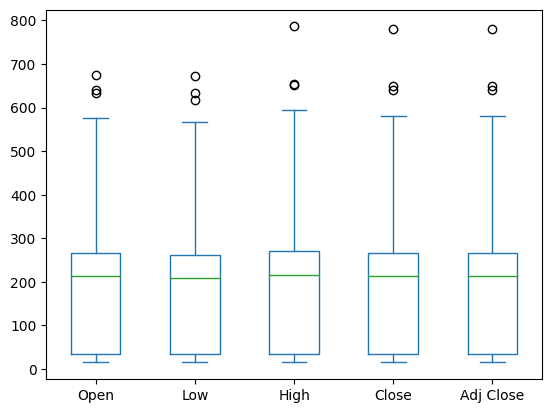

In [ ]:
data[['Open','Low','High','Close','Adj Close']].plot(kind='box')

In [ ]:
# Calculate quartiles for each column
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1
# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify and remove outliers
outliers = ((data['Close'] < lower_bound) | (data['Close'] > upper_bound))
data_no_outliers = data[outliers]

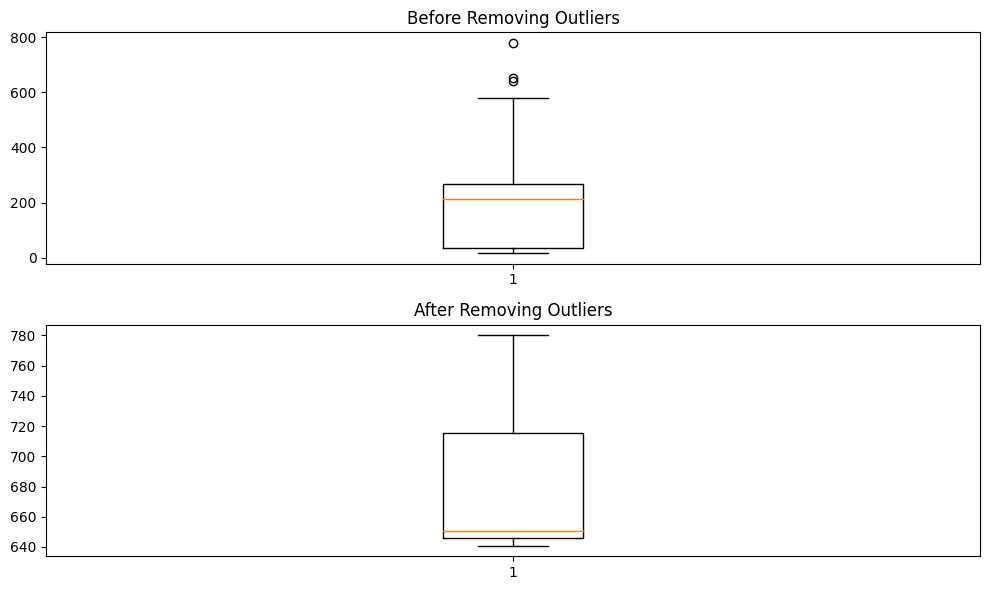

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(data['Close'])
plt.title('Before Removing Outliers')
plt.subplot(2, 1, 2)
plt.boxplot(data_no_outliers['Close'])
plt.title('After Removing Outliers')
plt.tight_layout()
plt.show()

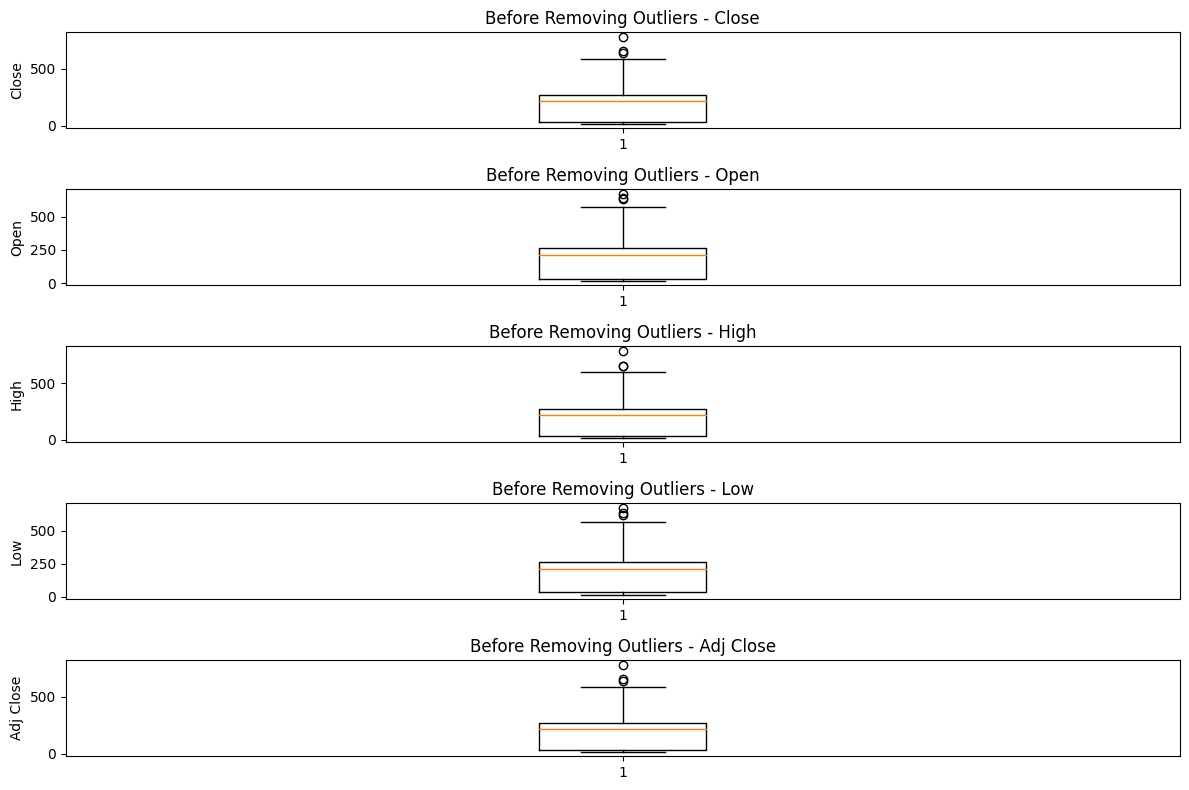

In [ ]:
import matplotlib.pyplot as plt

# Assuming data_no_outliers is a DataFrame containing data without outliers
# Assuming you have multiple columns you want to plot

columns_to_plot = ['Close', 'Open', 'High', 'Low','Adj Close']  #columns

plt.figure(figsize=(12, 8))

# Iterate through each column and create subplots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    plt.boxplot(data[col])
    plt.title('Before Removing Outliers - ' + col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()


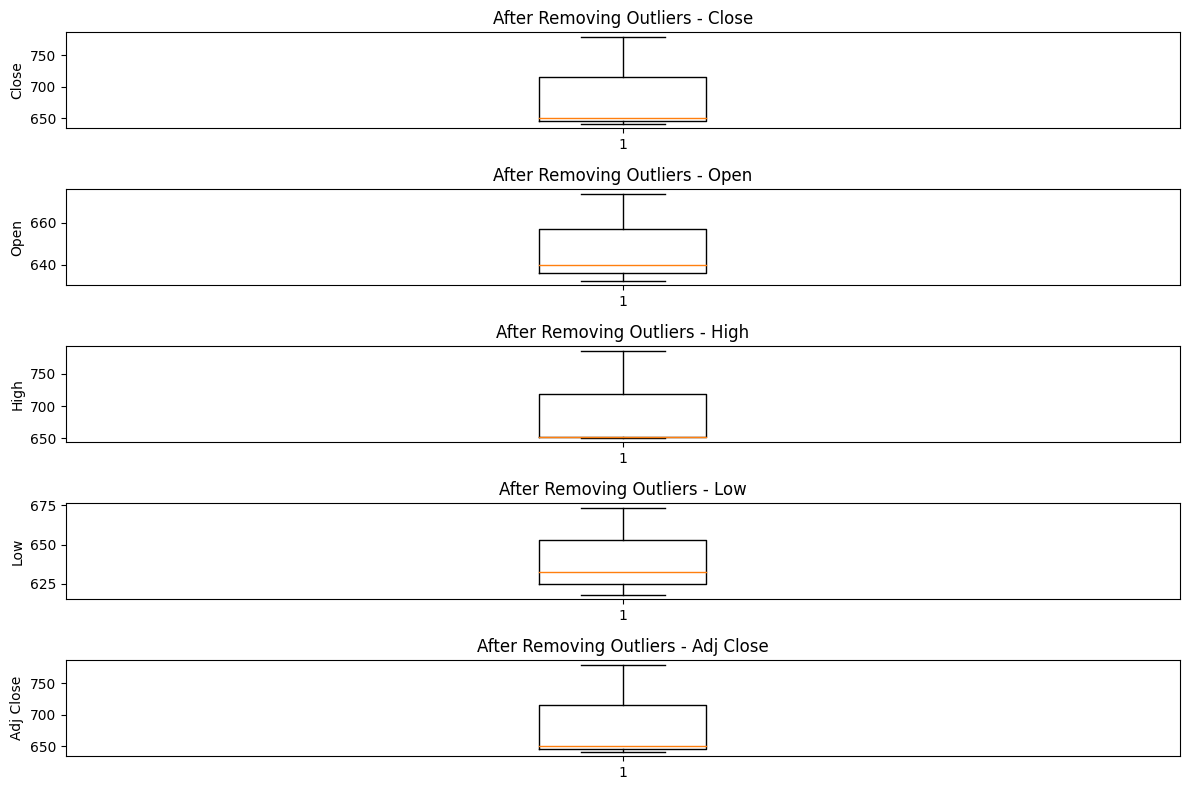

In [ ]:
import matplotlib.pyplot as plt

# Assuming data_no_outliers is a DataFrame containing data without outliers
# Assuming you have multiple columns you want to plot

columns_to_plot = ['Close', 'Open', 'High', 'Low','Adj Close']  # Example columns

plt.figure(figsize=(12, 8))

# Iterate through each column and create subplots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    plt.boxplot(data_no_outliers[col])
    plt.title('After Removing Outliers - ' + col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go
from plotly.offline import iplot

#Setting the layout for our plot
layout = go.Layout(
    title='Stock Price of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data=[{'x':data['Date'], 'y':data['Close']}]
plot=go.Figure(data=data,layout=layout)
plt.show()

In [ ]:
iplot(plot)

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/DIGICHROME/TSLA.csv',
                   parse_dates = ['Date'],
                   index_col = ['Date'])

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
# how many samples do we have
len(data)

2416

In [ ]:
#closing price for each day
stock_prices = pd.DataFrame(data['Close']).rename(columns={'Close':"Price"})
stock_prices.head()

,Price
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


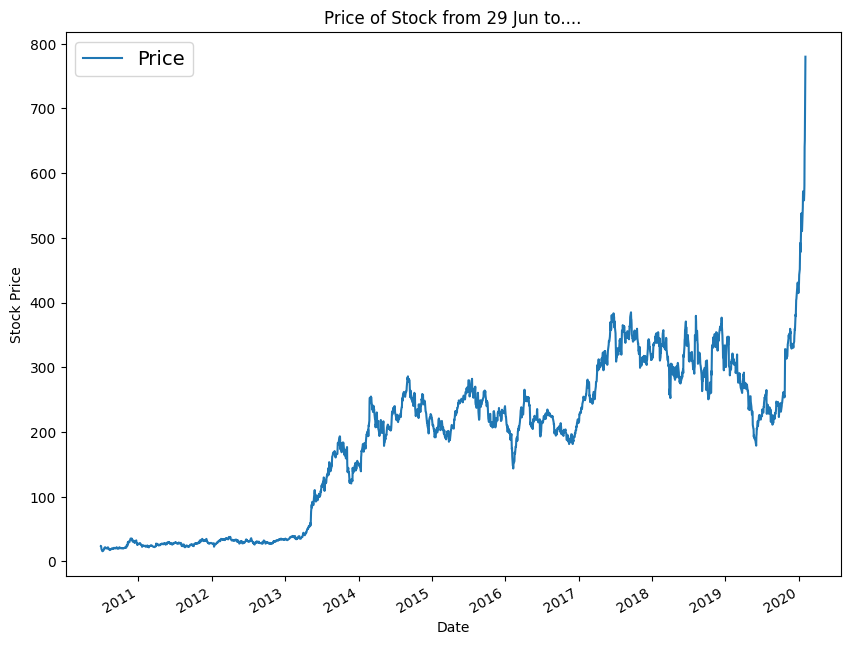

In [ ]:
#create a visual of this data
import matplotlib.pyplot as plt
stock_prices.plot(figsize=(10,8))
plt.ylabel('Stock Price')
plt.title('Price of Stock from 29 Jun to....')
plt.legend(fontsize=14);

In [ ]:
import csv
from datetime import datetime

In [ ]:
timesteps = []
stock_price = []
with open('/content/drive/MyDrive/DIGICHROME/TSLA.csv','r') as f:
  csv_reader = csv.reader(f,delimiter=',')
  next(csv_reader) # get rid of the column titles
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d"))
    stock_price.append(float(line[2]))

timesteps[:10], stock_price[:10]

([datetime.datetime(2010, 6, 29, 0, 0),
  datetime.datetime(2010, 6, 30, 0, 0),
  datetime.datetime(2010, 7, 1, 0, 0),
  datetime.datetime(2010, 7, 2, 0, 0),
  datetime.datetime(2010, 7, 6, 0, 0),
  datetime.datetime(2010, 7, 7, 0, 0),
  datetime.datetime(2010, 7, 8, 0, 0),
  datetime.datetime(2010, 7, 9, 0, 0),
  datetime.datetime(2010, 7, 12, 0, 0),
  datetime.datetime(2010, 7, 13, 0, 0)],
 [25.0, 30.42, 25.92, 23.1, 20.0, 16.629999, 17.52, 17.9, 18.07, 18.639999])

In [ ]:
import csv
from datetime import datetime

timesteps = []
stock_price = []

with open('/content/drive/MyDrive/DIGICHROME/TSLA.csv', 'r') as f:
    csv_reader = csv.reader(f, delimiter=',')
    next(csv_reader)  # Skip the column titles
    for line in csv_reader:
        # Assuming the date format in your CSV file is '%d.%m.%Y'
        timesteps.append(datetime.strptime(line[0], "%Y-%m-%d"))
        stock_price.append(float(line[2]))

print(timesteps[:10])
print(stock_price[:10])

[datetime.datetime(2010, 6, 29, 0, 0), datetime.datetime(2010, 6, 30, 0, 0), datetime.datetime(2010, 7, 1, 0, 0), datetime.datetime(2010, 7, 2, 0, 0), datetime.datetime(2010, 7, 6, 0, 0), datetime.datetime(2010, 7, 7, 0, 0), datetime.datetime(2010, 7, 8, 0, 0), datetime.datetime(2010, 7, 9, 0, 0), datetime.datetime(2010, 7, 12, 0, 0), datetime.datetime(2010, 7, 13, 0, 0)]
[25.0, 30.42, 25.92, 23.1, 20.0, 16.629999, 17.52, 17.9, 18.07, 18.639999]


Text(0, 0.5, 'Stock Price')

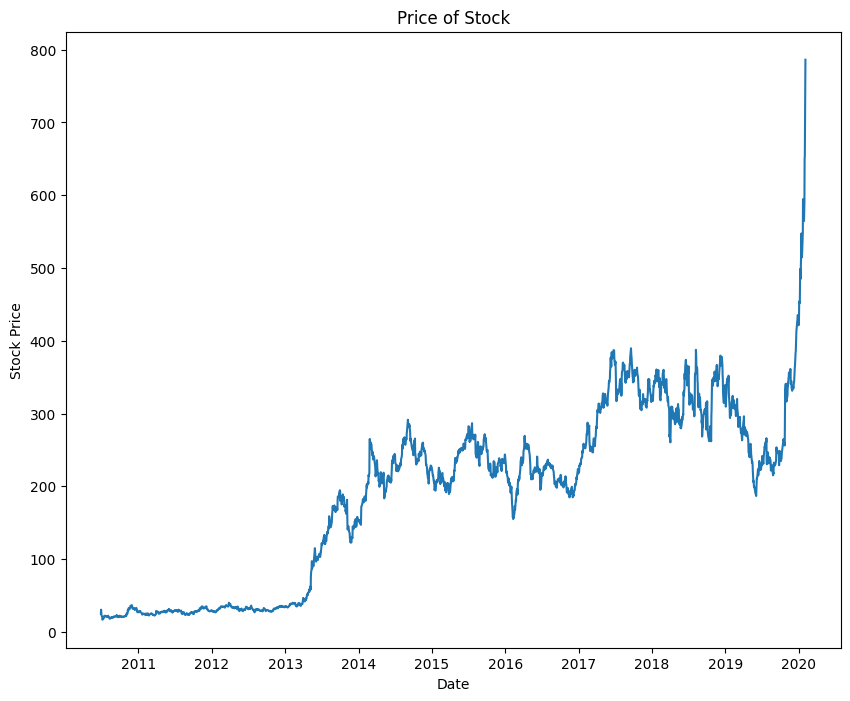

In [ ]:
##plot from csv
plt.figure(figsize=(10,8))
plt.plot(timesteps,stock_price)
plt.title("Price of Stock")
plt.xlabel('Date')
plt.ylabel('Stock Price')

In [ ]:
## get bitcoin date array
timesteps = stock_prices.index.to_numpy()
prices = stock_prices["Price"].to_numpy()

timesteps[:10], stock_price[:10]

(array(['2010-06-29T00:00:00.000000000', '2010-06-30T00:00:00.000000000',
        '2010-07-01T00:00:00.000000000', '2010-07-02T00:00:00.000000000',
        '2010-07-06T00:00:00.000000000', '2010-07-07T00:00:00.000000000',
        '2010-07-08T00:00:00.000000000', '2010-07-09T00:00:00.000000000',
        '2010-07-12T00:00:00.000000000', '2010-07-13T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 [25.0, 30.42, 25.92, 23.1, 20.0, 16.629999, 17.52, 17.9, 18.07, 18.639999])

Split the data of time series

In [ ]:
#Create train and test splits for time series data
split_size = int(0.8*len(prices)) #80% train , 20% test

#Create train data splits (everything before the split)
X_train,y_train = timesteps[:split_size], prices[:split_size]

##Create test data splits (everything before the split)
X_test,y_test = timesteps[split_size:], prices[split_size:]

len(X_train) , len(X_test) , len(y_train), len(y_test)

(1932, 484, 1932, 484)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'stock_prices' is a pandas DataFrame with a single column
# Convert the DataFrame to a numpy array
stock_prices_array = stock_prices.to_numpy()

# Reshape the numpy array
stock_prices_array = stock_prices_array.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
stock_prices_scaled = scaler.fit_transform(stock_prices_array)


In [ ]:
sequence_length = 100

X = []
y = []
for i in range(len(stock_prices_scaled) - sequence_length):
  X.append(stock_prices_scaled[i : i + sequence_length])
  y.append(stock_prices_scaled[i + sequence_length])

X = np.array(X)
y = np.array(y)

In [ ]:
def create_sequences_with_targets(stock_prices, sequence_length):
    X, y = [], []
    for i in range(len(stock_prices) - sequence_length):
        X.append(stock_prices[i:i + sequence_length])
        y.append(stock_prices[i + sequence_length])
    return np.array(X), np.array(y)

# Create sequences for training and test sets
X_train, y_train = create_sequences_with_targets(stock_prices_scaled, sequence_length)
X_test, y_test = create_sequences_with_targets(stock_prices_scaled, sequence_length)

# Print shapes of training and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2316, 100, 1)
y_train shape: (2316, 1)
X_test shape: (2316, 100, 1)
y_test shape: (2316, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
73/73 [==============================] - 15s 145ms/step - loss: 0.0053 - val_loss: 3.6909e-04
Epoch 2/10
73/73 [==============================] - 7s 91ms/step - loss: 3.6547e-04 - val_loss: 3.5385e-04
Epoch 3/10
73/73 [==============================] - 5s 62ms/step - loss: 3.4870e-04 - val_loss: 3.4522e-04
Epoch 4/10
73/73 [==============================] - 3s 42ms/step - loss: 3.3046e-04 - val_loss: 3.3648e-04
Epoch 5/10
73/73 [==============================] - 3s 42ms/step - loss: 3.2228e-04 - val_loss: 2.9778e-04
Epoch 6/10
73/73 [==============================] - 3s 42ms/step - loss: 2.9889e-04 - val_loss: 2.8058e-04
Epoch 7/10
73/73 [==============================] - 4s 61ms/step - loss: 2.8771e-04 - val_loss: 2.9031e-04
Epoch 8/10
73/73 [==============================] - 3s 41ms/step - loss: 2.7697e-04 - val_loss: 2.6581e-04
Epoch 9/10
73/73 [==============================] - 3s 42ms/step - loss: 2.5600e-04 - val_loss: 2.7453e-04
Epoch 10/10
73/73 [====================

73/73 [==============================] - 1s 15ms/step - loss: 2.3470e-04
Test Loss: 0.00023469871666748077


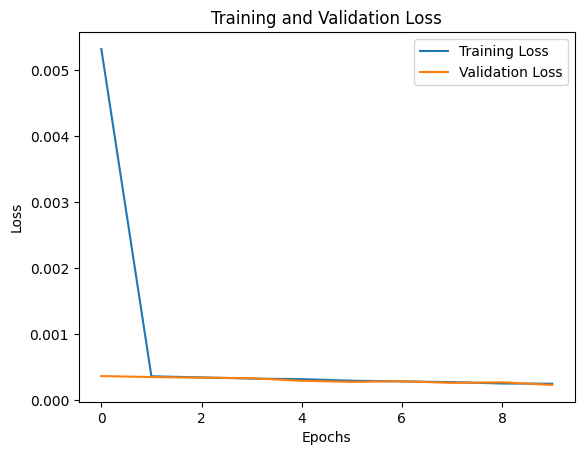

In [ ]:
# Evaluate model performance
loss = model.evaluate(X_test, y_test)

# Print loss
print("Test Loss:", loss)

# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

73/73 [==============================] - 2s 15ms/step


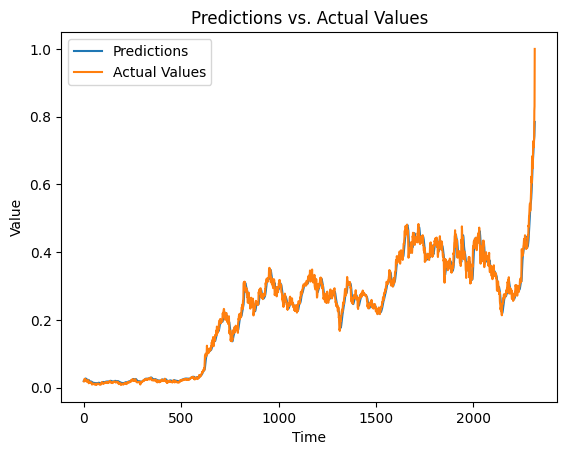

Mean Absolute Error For Test: 0.010163721425198599
Root Mean Squared Error For Test: 0.015319880753886683


In [ ]:
# Make predictions
y_test_pred = model.predict(X_test)

# Plot predictions vs. actual values
plt.plot(y_test_pred, label='Predictions')
plt.plot(y_test, label='Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Predictions vs. Actual Values')
plt.legend()
plt.show()

# Calculate additional metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print("Mean Absolute Error For Test:", mae_test)
print("Root Mean Squared Error For Test:", rmse_test)

73/73 [==============================] - 1s 11ms/step


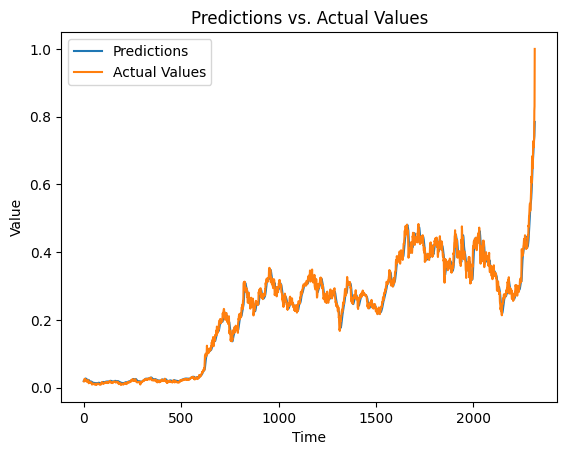

Mean Absolute Error For Train: 0.010163721425198599
Root Mean Squared Error For Train: 0.015319880753886683


In [ ]:
# Make predictions
y_train_pred = model.predict(X_train)

# Plot predictions vs. actual values
plt.plot(y_train_pred, label='Predictions')
plt.plot(y_train, label='Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Predictions vs. Actual Values')
plt.legend()
plt.show()

# Calculate additional metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

print("Mean Absolute Error For Train:", mae_train)
print("Root Mean Squared Error For Train:", rmse_train)